# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [20]:
import pandas as pd



# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [21]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [22]:
# Your code here:

sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [23]:
# Your code here:

sensor.isnull().sum()#no null data

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [24]:
sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [25]:
timespan=pd.date_range(start='1/1/2018 00:00:00',end='1/1/2018 00:29:10', periods=sensor.shape[0])

timespan


DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

Assign the time series index to the dataframe's index.

In [26]:
sensor['date']=timespan
sensor.index = pd.DatetimeIndex(sensor.date, freq='infer')
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,date
date,,,,,,,,,,,,,
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,2018-01-01 00:00:00
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,2018-01-01 00:00:01
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,2018-01-01 00:00:02
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,2018-01-01 00:00:03
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,2018-01-01 00:00:04


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """


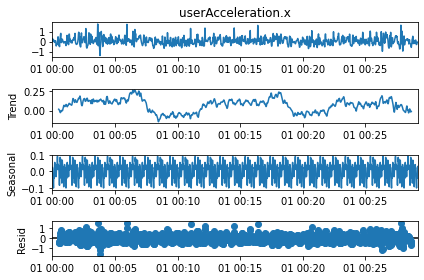

In [17]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
%matplotlib inline

res = sm.tsa.seasonal_decompose( sensor["userAcceleration.x"], freq=60)

res.plot();


Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


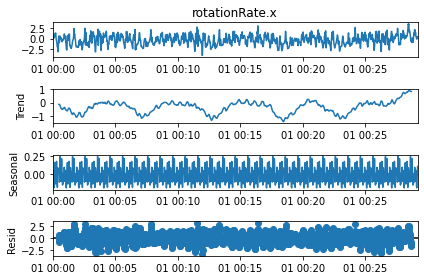

In [46]:
res = sm.tsa.seasonal_decompose( sensor["rotationRate.x"], freq=60)

res.plot();


# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

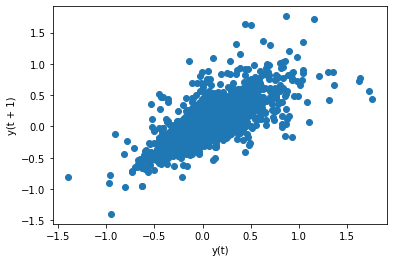

In [47]:

pd.plotting.lag_plot(sensor["userAcceleration.x"], lag=1)


Create a lag plot for `rotationRate.x`

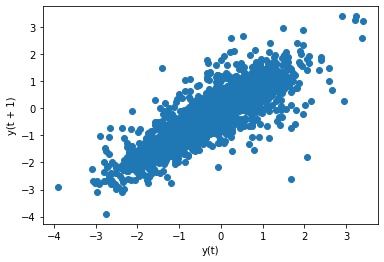

In [48]:
pd.plotting.lag_plot(sensor["rotationRate.x"], lag=1)



What are your conclusions from both visualizations?

Both the series seems to be autocorrelated



The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [56]:
from statsmodels.tsa.stattools import adfuller


def ADF_Stationarity_Test( timeseries, printResults = True):
        #Dickey-Fuller test:
        adfTest = adfuller(timeseries, autolag='AIC')
        
        pValue = adfTest[1]
        
        isstationary=False
        
        if (pValue<0.05):
            print('the series is Stationary')
        else :
            print('the series is not Stationary')
        
        if printResults:
            dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
            #Add Critical Values
            for key,value in adfTest[4].items():
                dfResults['Critical Value (%s)'%key] = value
            print('Augmented Dickey-Fuller Test Results:')
            print(dfResults)

ADF_Stationarity_Test( sensor["rotationRate.x"], printResults = True)

the series is Stationary
Augmented Dickey-Fuller Test Results:
ADF Test Statistic        -5.269861
P-Value                    0.000006
# Lags Used               25.000000
# Observations Used     1725.000000
Critical Value (1%)       -3.434147
Critical Value (5%)       -2.863217
Critical Value (10%)      -2.567663
dtype: float64


In [57]:
ADF_Stationarity_Test( sensor["userAcceleration.x"], printResults = True)

the series is Stationary
Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -1.795799e+01
P-Value                 2.823439e-30
# Lags Used             4.000000e+00
# Observations Used     1.746000e+03
Critical Value (1%)    -3.434101e+00
Critical Value (5%)    -2.863197e+00
Critical Value (10%)   -2.567652e+00
dtype: float64


What are your conclusions from this test?

A time series is stationary if a single shift in time doesn’t change the time series statistical properties, in which case unit root does not exist.

The Null and Alternate hypothesis of the Augmented Dickey-Fuller test is defined as follows:

Null Hypothesis states there is the presence of a unit root.
Alternate Hypothesis states there is no unit root. In other words, Stationarity exists.



p_value for both the series is << of 0.05, so we reject the null hypothesis and both the series are stationary .



Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [63]:
from statsmodels.tsa.arima_model import ARMA

train = sensor["userAcceleration.x"][:1741]
test = sensor["userAcceleration.x"][1741:]
model=ARMA(train, order=(2,1))
arma_results = model.fit()
y_pred = arma_results.predict(start=len(train),end=len(train)+len(test)-1, dynamic=False)
results = pd.DataFrame({
    "GT":test,
    "pred":y_pred,
    "diff":y_pred-test
})

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [72]:
from sklearn.metrics import mean_squared_error
import numpy as np
RMSE=np.sqrt(mean_squared_error(test,y_pred))
print("MSE = ",round(mean_squared_error(test,y_pred),5))
print("RMSE = ",RMSE)
display(results)


MSE =  0.05076
RMSE =  0.22529864037208244


,GT,pred,diff
date,,,
2018-01-01 00:29:01,0.149749,0.173148,0.023399
2018-01-01 00:29:02,0.038461,0.142896,0.104435
2018-01-01 00:29:03,-0.169175,0.100522,0.269697
2018-01-01 00:29:04,-0.300361,0.070106,0.370467
2018-01-01 00:29:05,-0.270174,0.056099,0.326273
2018-01-01 00:29:06,-0.268367,0.053778,0.322145
2018-01-01 00:29:07,-0.102444,0.056790,0.159234
2018-01-01 00:29:08,-0.085590,0.060646,0.146236
2018-01-01 00:29:09,-0.048105,0.063316,0.111421


In [78]:
maximum=sensor["userAcceleration.x"].max()
mean=sensor["userAcceleration.x"].mean()

print(mean,RMSE,RMSE/mean)
#RMSE seems pretty high

0.062492765848086815 0.22529864037208244 3.605195534468088


# Filtering of the userAcceleration.x signal with a lowpass filter

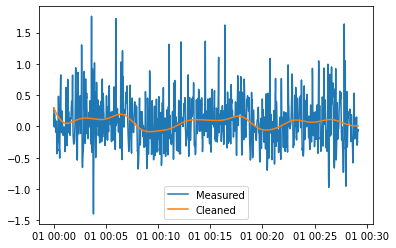

In [27]:
from scipy import signal

# sampling Frequency
Y=sensor["userAcceleration.x"]
X=sensor['date']
Fm=1000
Fc=10

b, a = signal.butter(3, Fc/Fm)

# aplicamos el filtro
Y_clean = signal.filtfilt(b, a, Y)

plt.plot(X,Y)
plt.plot(X,Y_clean)
plt.legend(["Measured","Cleaned"])